# Monitoria: Cálculo Numérico (EAMB-018A)
Data: 28/04/2021


- **Monitores**:
  - Paulo Victor L. Santos
  - Leonardo T. Ferreira
  - Ricardo A. Fernandes


- **Assuntos abordados**:
  - Dúvidas sobre o trabalho da AB1 (SEL)


- **Links úteis**:
  - [Operações com matrizes em Julia](https://tutorescn.github.io/)
  - [MATLAB-Python-Julia cheatsheet](https://cheatsheets.quantecon.org/)

## Como utilizar os valores tabelados?

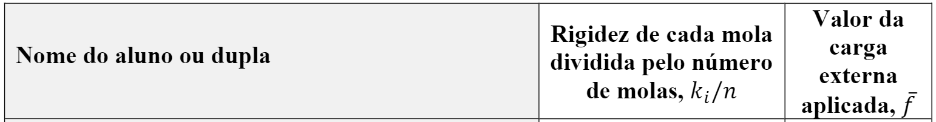

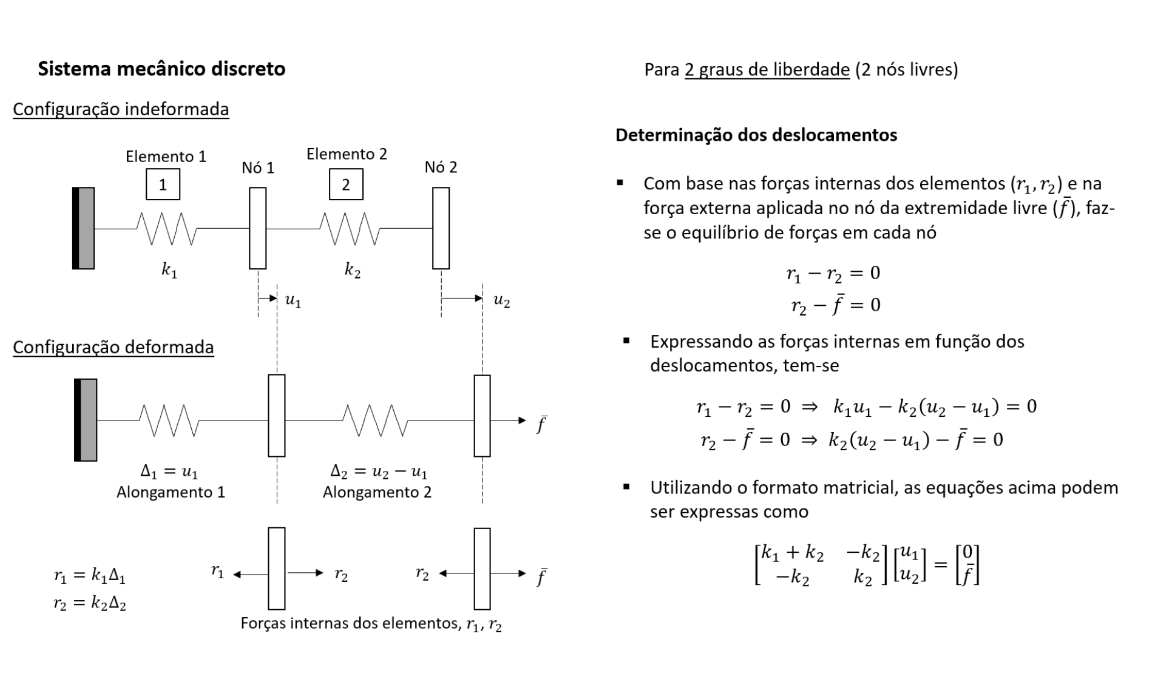

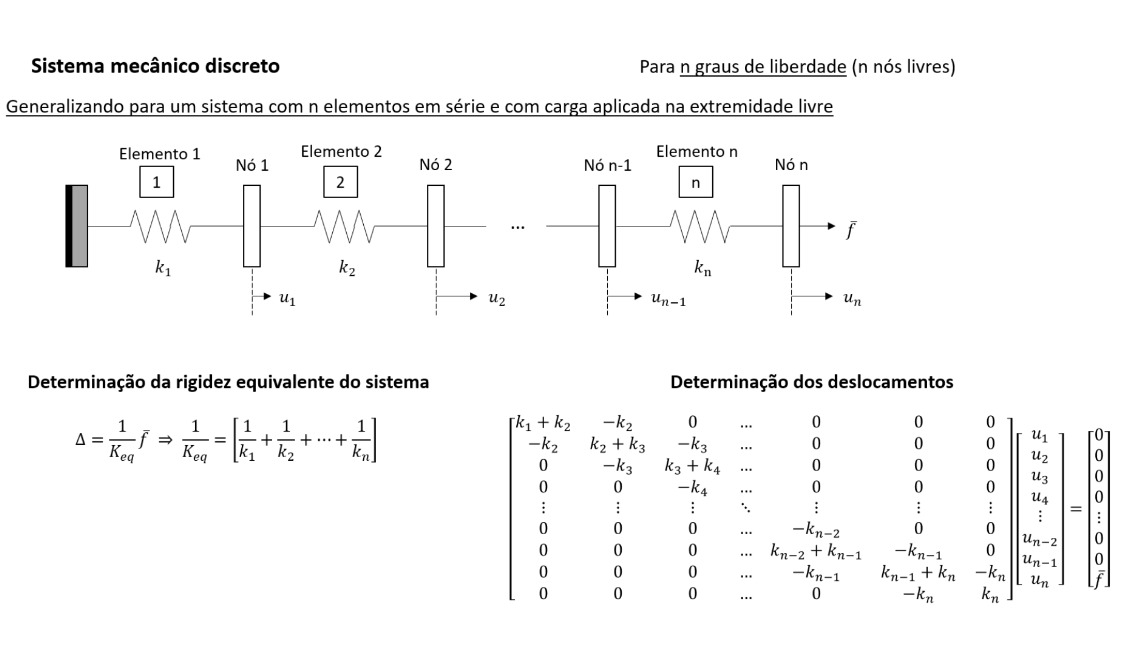

### Por exemplo, para o sistema com 5 elementos (molas)

In [1]:
n = 5
s, f = 1.0e+7, 2.0e+5  # Valores lidos da tabela
k = s * n  # Valor da rigidez de cada mola

5.0e7

In [2]:
# Montando o vetor b de constantes
b = [0, 0, 0, 0, f]
# ou
b = zeros(n)
b[n] = f;

In [3]:
b

5-element Vector{Float64}:
      0.0
      0.0
      0.0
      0.0
 200000.0

In [4]:
# Montando a matriz A dos coeficientes
k1, k2, k3, k4, k5 = k, k, k, k, k

A = zeros(n, n)
# Acumular contribuição do primeiro elemento
A[1, 1] = A[1, 1] + k1
# Acumular contribuição do segundo elemento
i, j = 1, 2
A[i, i] += k2
A[i, j] -= k2
A[j, i] -= k2
A[j, j] += k2
# Acumular contribuição do terceiro elemento
i, j = 2, 3
A[i, i] += k3
A[i, j] -= k3
A[j, i] -= k3
A[j, j] += k3
# Acumular contribuição do quarto elemento
i, j = 3, 4
A[i, i] += k4
A[i, j] -= k4
A[j, i] -= k4
A[j, j] += k4
# Acumular contribuição do quinto elemento
i, j = 4, 5
A[i, i] += k5
A[i, j] -= k5
A[j, i] -= k5
A[j, j] += k5

A

5×5 Matrix{Float64}:
  1.0e8  -5.0e7   0.0     0.0     0.0
 -5.0e7   1.0e8  -5.0e7   0.0     0.0
  0.0    -5.0e7   1.0e8  -5.0e7   0.0
  0.0     0.0    -5.0e7   1.0e8  -5.0e7
  0.0     0.0     0.0    -5.0e7   5.0e7

In [5]:
# Resolvendo o sistema
u5 = A \ b

5-element Vector{Float64}:
 0.003999999999999999
 0.007999999999999998
 0.011999999999999997
 0.015999999999999997
 0.02

In [6]:
# Usando uma estrutura de repetição (loops)
soma = 0.
for i = 1:6
    soma += i  # soma = soma + i
end
soma

21.0

## Como calcular a norma de um vetor

In [7]:
x = rand(5)

5-element Vector{Float64}:
 0.9892927125466802
 0.4830559343791516
 0.7702622097958423
 0.964969047549072
 0.501311379759241

In [8]:
nL2 = 0.  # norma L2 de um vetor
for x_ = x
    nL2 += x_^2
end
nL2 = sqrt(nL2)

1.7285327132803519

In [9]:
using LinearAlgebra
norm(x, 2), norm(x), norm(x, 1)

(1.7285327132803519, 1.7285327132803519, 3.7088912840299875)

## Como calcular a norma de uma matriz

In [10]:
?norm

search: norm normpath normalize normalize! opnorm issubnormal UniformScaling



```
norm(A, p::Real=2)
```

For any iterable container `A` (including arrays of any dimension) of numbers (or any element type for which `norm` is defined), compute the `p`-norm (defaulting to `p=2`) as if `A` were a vector of the corresponding length.

The `p`-norm is defined as

$$
\|A\|_p = \left( \sum_{i=1}^n | a_i | ^p \right)^{1/p}
$$

with $a_i$ the entries of $A$, $| a_i |$ the [`norm`](@ref) of $a_i$, and $n$ the length of $A$. Since the `p`-norm is computed using the [`norm`](@ref)s of the entries of `A`, the `p`-norm of a vector of vectors is not compatible with the interpretation of it as a block vector in general if `p != 2`.

`p` can assume any numeric value (even though not all values produce a mathematically valid vector norm). In particular, `norm(A, Inf)` returns the largest value in `abs.(A)`, whereas `norm(A, -Inf)` returns the smallest. If `A` is a matrix and `p=2`, then this is equivalent to the Frobenius norm.

The second argument `p` is not necessarily a part of the interface for `norm`, i.e. a custom type may only implement `norm(A)` without second argument.

Use [`opnorm`](@ref) to compute the operator norm of a matrix.

# Examples

```jldoctest
julia> v = [3, -2, 6]
3-element Vector{Int64}:
  3
 -2
  6

julia> norm(v)
7.0

julia> norm(v, 1)
11.0

julia> norm(v, Inf)
6.0

julia> norm([1 2 3; 4 5 6; 7 8 9])
16.881943016134134

julia> norm([1 2 3 4 5 6 7 8 9])
16.881943016134134

julia> norm(1:9)
16.881943016134134

julia> norm(hcat(v,v), 1) == norm(vcat(v,v), 1) != norm([v,v], 1)
true

julia> norm(hcat(v,v), 2) == norm(vcat(v,v), 2) == norm([v,v], 2)
true

julia> norm(hcat(v,v), Inf) == norm(vcat(v,v), Inf) != norm([v,v], Inf)
true
```

---

```
norm(x::Number, p::Real=2)
```

For numbers, return $\left( |x|^p \right)^{1/p}$.

# Examples

```jldoctest
julia> norm(2, 1)
2.0

julia> norm(-2, 1)
2.0

julia> norm(2, 2)
2.0

julia> norm(-2, 2)
2.0

julia> norm(2, Inf)
2.0

julia> norm(-2, Inf)
2.0
```


In [11]:
?opnorm

search: opnorm



```
opnorm(A::AbstractMatrix, p::Real=2)
```

Compute the operator norm (or matrix norm) induced by the vector `p`-norm, where valid values of `p` are `1`, `2`, or `Inf`. (Note that for sparse matrices, `p=2` is currently not implemented.) Use [`norm`](@ref) to compute the Frobenius norm.

When `p=1`, the operator norm is the maximum absolute column sum of `A`:

$$
\|A\|_1 = \max_{1 ≤ j ≤ n} \sum_{i=1}^m | a_{ij} |
$$

with $a_{ij}$ the entries of $A$, and $m$ and $n$ its dimensions.

When `p=2`, the operator norm is the spectral norm, equal to the largest singular value of `A`.

When `p=Inf`, the operator norm is the maximum absolute row sum of `A`:

$$
\|A\|_\infty = \max_{1 ≤ i ≤ m} \sum _{j=1}^n | a_{ij} |
$$

# Examples

```jldoctest
julia> A = [1 -2 -3; 2 3 -1]
2×3 Matrix{Int64}:
 1  -2  -3
 2   3  -1

julia> opnorm(A, Inf)
6.0

julia> opnorm(A, 1)
5.0
```

---

```
opnorm(x::Number, p::Real=2)
```

For numbers, return $\left( |x|^p \right)^{1/p}$. This is equivalent to [`norm`](@ref).

---

```
opnorm(A::Adjoint{<:Any,<:AbstracVector}, q::Real=2)
opnorm(A::Transpose{<:Any,<:AbstracVector}, q::Real=2)
```

For Adjoint/Transpose-wrapped vectors, return the operator $q$-norm of `A`, which is equivalent to the `p`-norm with value `p = q/(q-1)`. They coincide at `p = q = 2`. Use [`norm`](@ref) to compute the `p` norm of `A` as a vector.

The difference in norm between a vector space and its dual arises to preserve the relationship between duality and the dot product, and the result is consistent with the operator `p`-norm of a `1 × n` matrix.

# Examples

```jldoctest
julia> v = [1; im];

julia> vc = v';

julia> opnorm(vc, 1)
1.0

julia> norm(vc, 1)
2.0

julia> norm(v, 1)
2.0

julia> opnorm(vc, 2)
1.4142135623730951

julia> norm(vc, 2)
1.4142135623730951

julia> norm(v, 2)
1.4142135623730951

julia> opnorm(vc, Inf)
2.0

julia> norm(vc, Inf)
1.0

julia> norm(v, Inf)
1.0
```


In [12]:
A = rand(10, 10)

10×10 Matrix{Float64}:
 0.906657   0.391836  0.558126  0.330352  …  0.104676  0.948184  0.555134
 0.0330786  0.210021  0.435075  0.713267     0.668861  0.663695  0.941352
 0.115487   0.788504  0.738868  0.108031     0.382018  0.880946  0.955617
 0.95657    0.698611  0.159839  0.384337     0.911973  0.082647  0.74982
 0.148336   0.72456   0.269513  0.27535      0.115376  0.275302  0.773463
 0.91637    0.242301  0.423327  0.260986  …  0.834552  0.922428  0.799037
 0.595091   0.818516  0.598683  0.633526     0.921286  0.919797  0.368254
 0.319293   0.391824  0.211795  0.599702     0.342988  0.613618  0.206247
 0.789381   0.157525  0.676195  0.214489     0.488208  0.244214  0.696305
 0.491732   0.400777  0.452058  0.495268     0.978758  0.179969  0.689392

In [13]:
norm(A, 2)

5.733025647553886

In [14]:
opnorm(A, 2)

5.097971262447236

## Como medir o tempo computacional

In [15]:
A = rand(10, 10)
b = rand(10)

# Resolver sistema A * x = b
@time x = A \ b
@time x = A \ b
@time x = A \ b
@time x = A \ b

t = @elapsed x = A \ b
println("t = ", t, " secs.")

t5 = @elapsed begin
    x = A \ b
    x = A \ b
    x = A \ b
    x = A \ b
    x = A \ b
    x = A \ b
end
println("t5 = ", t5, " secs.")

  0.000013 seconds (3 allocations: 1.188 KiB)
  0.000012 seconds (3 allocations: 1.188 KiB)
  0.000012 seconds (3 allocations: 1.188 KiB)
  0.000013 seconds (3 allocations: 1.188 KiB)
t = 1.16e-5 secs.
t5 = 2.07e-5 secs.


## Como construir gráficos de barras

In [16]:
using StatsPlots

In [17]:
xlabels = ["n 1", "n 5", "n 3"]
groups = ["Grupo 1", "Grupo 2", "Grupo 3"]

nlabels, ngroups = length(xlabels), length(groups)
results = rand(nlabels, ngroups)

3×3 Matrix{Float64}:
 0.482503  0.793316  0.447465
 0.835241  0.370317  0.302118
 0.522683  0.566554  0.720925

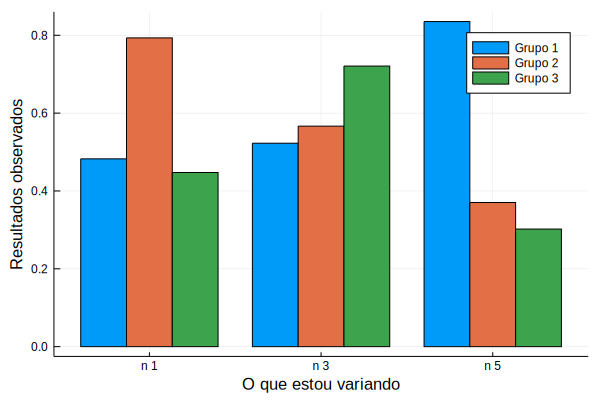

In [18]:
name = repeat(xlabels, outer=ngroups)
leg = repeat(groups, inner=nlabels)
groupedbar(name, results, group=leg, xlabel="O que estou variando", ylabel="Resultados observados")